In [10]:
import numpy as np
import matplotlib.pyplot as plt
from gradient_free_optimizers import ParticleSwarmOptimizer
from gradient_free_optimizers.converter import Converter


In [11]:
def objective_function(pos_new):
    score = -(pos_new["x1"] * pos_new["x1"] + pos_new["x2"] * pos_new["x2"])
    return score


search_space = {"x1": np.arange(-10, 11, 0.1), "x2": np.arange(-10, 11, 0.1)}



In [18]:
def visualize_search_path(n_vertices, n_grid, n_iter, random_state):
    opt = ParticleSwarmOptimizer(search_space)
    opt.search(
        objective_function,
        n_iter=n_iter,
        initialize={"vertices": n_vertices, "grid": n_grid}, verbosity={
            "progress_bar": False,
            "print_results": False,
        },
        random_state=random_state,
    )
    
    conv = Converter(search_space)

    plt.figure(figsize=(12, 10), dpi=100)
    plt.set_cmap("jet")

    for n, opt_ in enumerate(opt.optimizers):
        pos_list = np.array(opt_.pos_new_list)
        score_list = np.array(opt_.score_new_list)

        values_list = conv.positions2values(pos_list)
        values_list = np.array(values_list)

        plt.plot(
            values_list[:, 0],
            values_list[:, 1],
            linestyle="--",
            marker=",",
            color="black",
            alpha=0.33,
            label=n,
        )
        plt.scatter(
            values_list[:, 0],
            values_list[:, 1],
            c=score_list,
            marker="H",
            s=25,
            vmin=-100,
            vmax=0,
            label=n,
        )


    plt.xlabel("x1")
    plt.ylabel("x2")

    plt.xlim((-15, 15))
    plt.ylim((-12, 12))
    plt.colorbar()
    # plt.legend(loc="upper left", bbox_to_anchor=(-0.10, 1.2))

    plt.tight_layout()
    plt.show()

    

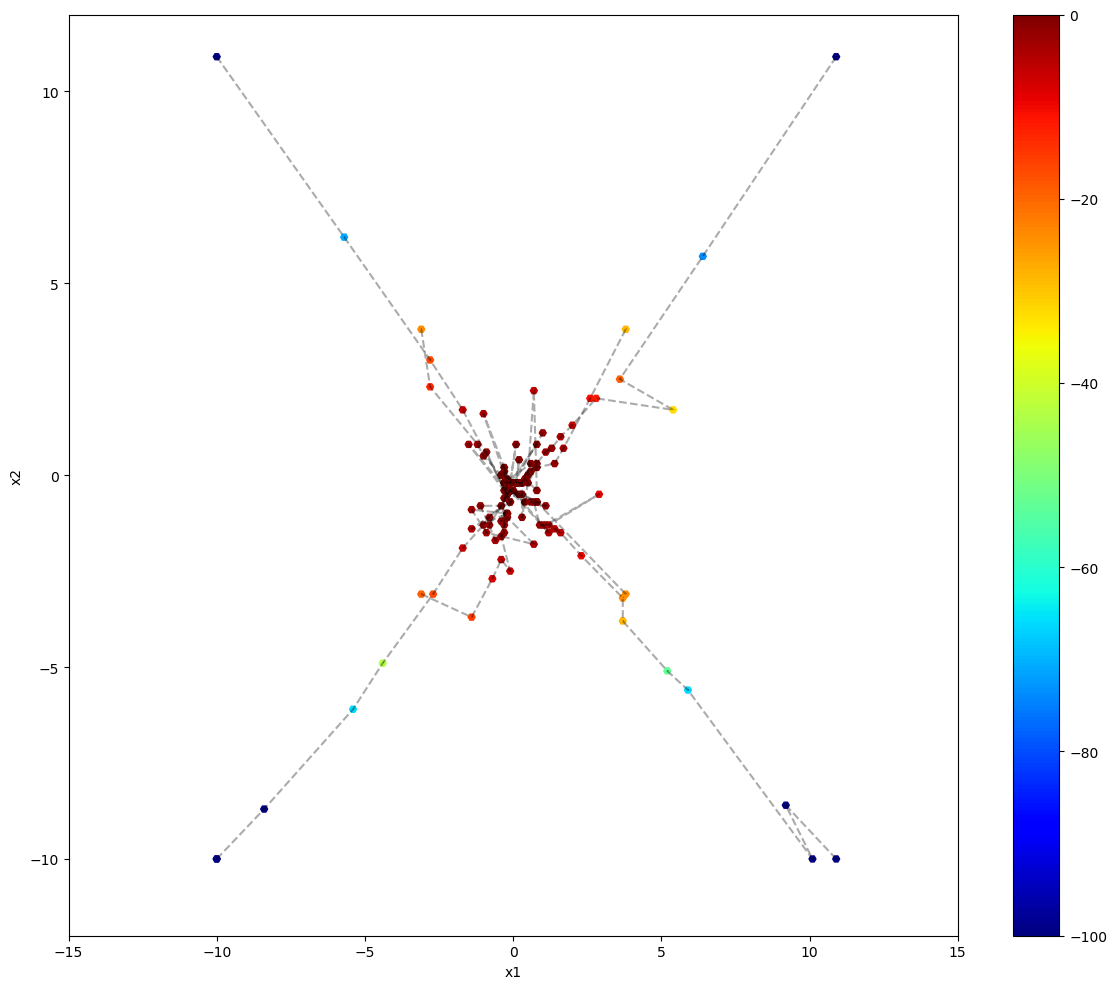

In [19]:
n_vertices = 4
n_grid = 4
n_iter = 150
random_state = 1

visualize_search_path(n_vertices, n_grid, n_iter, random_state)